### Importing Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from random import randint as rnd
from random import shuffle

### Setting Parameters

In [2]:
n_cities = 4
width = 500
height = 500
mutation_rate = 0.8
population_size = 1000
epoch = 200

### Random Cities Locations Function

In [3]:
def random_city_creator(n, w, h):
    offset = 20
    cities = []
    for i in range(n):
        x_rnd = rnd(offset, w-offset)
        y_rnd = rnd(offset, h-offset)
        cities.append([x_rnd,y_rnd])
    return cities

### Initial Population Function

In [4]:
def init_population(n, p):
    population_list = []
    for i in range(p):
        path = [i for i in range(n)]
        shuffle(path)
        path += [None]
        population_list.append(path)
    return population_list

### Cross Over Function

In [5]:
def cross_over(population_list, n, p):
    for i in range(p):
        path = population_list[i][:n]
        population_list.append(path+[None])
    return population_list

### Mutation Function

In [6]:
def mutation(population_list, n, p, rate):
    length = len(population_list)
    candidates = [i for i in range(p, length)]
    shuffle(candidates)
    candidates = candidates[:int(len(candidates) * rate)]
    for candidate_num in candidates:
        cell_1 = rnd(0,n-1)
        cell_2 = rnd(0,n-1)
        population_list[candidate_num][cell_1], population_list[candidate_num][cell_2] = population_list[candidate_num][cell_2], population_list[candidate_num][cell_1]
    return population_list

### Fitness Function

In [7]:
def euclidean_distance(path, cities_locations):
    distance = 0
    for i in range(len(path)-1):
        city1 = cities_locations[path[i]]
        city2 = cities_locations[path[i+1]]
        val = np.sqrt((city1[0]-city2[0])**2 + (city1[1]-city2[1])**2)
        distance += val
    return distance
def fitness(population_list, n):
    length = len(population_list)
    for i in range(length):
        if population_list[i][n] == None:
            population_list[i][n] = euclidean_distance(population_list[i][:n], cities)
    return population_list

### Sorter Function

In [8]:
def sorter(population_list, n):
    population_list.sort(key = lambda x: x[n])
    return population_list

### Draw Path Function

In [9]:
def draw_cities(img, cities_locations, color=(26, 32, 40)):
    for x,y in cities_locations:
        img = cv2.circle(img, (x,y), 6, color, -1)
    return img
def draw_path_lines(img, path, cities_locations, color=(11, 152, 200)):
    cords = []
    for i in path:
        cords.append(cities_locations[i])
    for i in range(len(cords)-1):
        img = cv2.line(img, cords[i], cords[i+1], color, 2)
    return img
def draw_path(path, cities_locations, w, h):
    img = np.full((w, h, 3), 255, np.int16)
    img = draw_cities(img, cities_locations)
    img = draw_path_lines(img, path, cities_locations)
    return img

### Main

Best Path:[6, 9, 1, 0, 14, 5, 12, 10, 3, 8, 7, 11, 4, 2, 13] --> Distance:1312.7710905585395


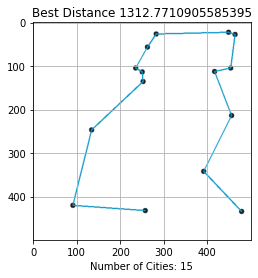

In [11]:
cities = random_city_creator( n_cities, width, height)
current_population = init_population(n_cities, population_size)
for epoch_num in range(1,epoch):
    current_population = cross_over(current_population, n_cities, population_size)
    current_population = mutation(current_population, n_cities, population_size, mutation_rate)
    current_population = fitness(current_population, n_cities)
    current_population = sorter(current_population, n_cities)
    current_population = current_population[:population_size]
    #print(f"{epoch_num}# -- Best Path Distance: {current_population[0][n_cities]}")
else:
    print(f"Best Path:{current_population[0][:n_cities]} --> Distance:{current_population[0][n_cities]}")
    img = draw_path(current_population[0][:n_cities], cities, width, height)
    plt.imshow(img)
    plt.title(f"Best Distance {current_population[0][n_cities]}")
    plt.xlabel(f"Number of Cities: {n_cities}")
    plt.grid()
    plt.show()